# 최적화 함수 (Optimizer)
### 간단한 SGD

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_sample = np.random.uniform(-2, 2, size=10)

def loss(x):
    return x**2

def gradient(x):
    return 2*x

In [3]:
def sgd(lr=0.1, epochs=10):
    w = np.random.uniform(-2, 2)
    history = [w]
    for _ in range(epochs):
        sample = np.random.choice(data_sample)
        grad = gradient(sample)
        w -= lr * grad
        history.append(w)
    return history

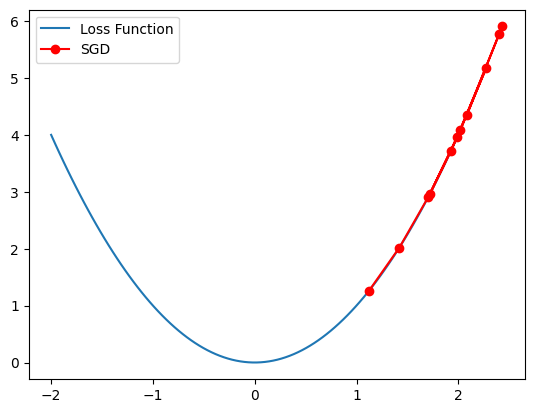

In [4]:
history = sgd()
x_vals = np.linspace(-2, 2, 100)
plt.plot(x_vals, loss(x_vals), label='Loss Function')
plt.plot(history, loss(np.array(history)), 'ro-', label='SGD')
plt.legend()
plt.show()

### 모멘텀 추가

In [5]:
def sgd_momentum(lr=0.1, momentum=0.9, epochs=10):
    w = np.random.uniform(-2, 2)
    v = 0
    history = [w]
    for _ in range(epochs):
        sample = np.random.choice(data_sample)
        grad = gradient(sample)
        v = momentum * v - lr * grad
        w += v
        history.append(w)
    return history

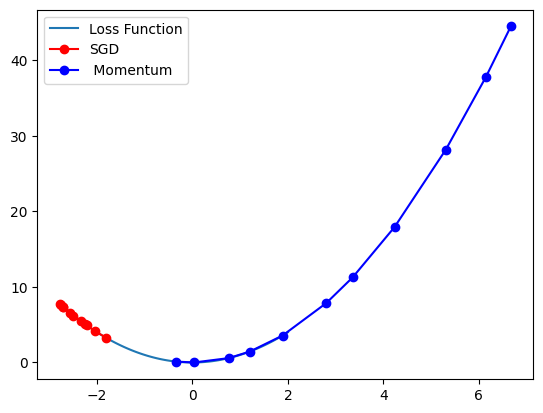

In [6]:
sgd_history = sgd()
momentum_history = sgd_momentum()

x_vals = np.linspace(-2, 2, 100)
plt.plot(x_vals, loss(x_vals), label='Loss Function')
plt.plot(sgd_history, loss(np.array(sgd_history)), 'ro-', label='SGD')
plt.plot(momentum_history, loss(np.array(momentum_history)), 'bo-', label=' Momentum')
plt.legend()
plt.show()

### 학습률에 따른 SGD

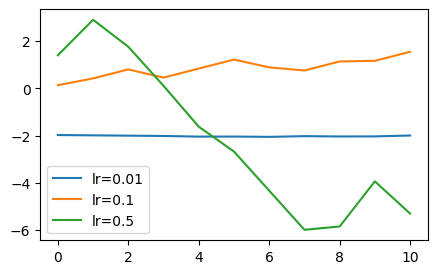

In [7]:
learning_rates = [0.01, 0.1, 0.5]
# histories = [sgd_momentum(lr=lr) for lr in learning_rates]
histories  = [sgd(lr=lr) for lr in learning_rates]

plt.figure(figsize=(5,3))
for i, history in enumerate(histories):
    plt.plot(history, label=f'lr={learning_rates[i]}')
plt.legend()
plt.show()

### AdaGrad

In [8]:
def adagrad(lr=0.1, epsilon=1e-8, epochs=10):
    w = np.random.uniform(-2, 2)
    h = 0
    history = [w]
    for _ in range(epochs):
        # sample = np.random.choice(data_sample)
        grad = gradient(w)
        h += grad**2
        w -= lr * grad / (np.sqrt(h) + epsilon)
        history.append(w)
    return history

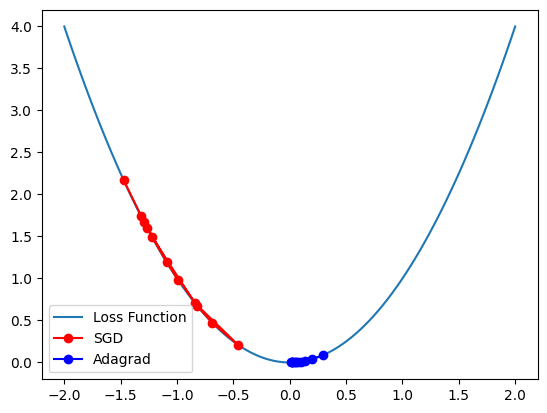

In [9]:
sgd_history = sgd()
adagrad_history = adagrad()

x_vals = np.linspace(-2, 2, 100)
plt.plot(x_vals, loss(x_vals), label='Loss Function')

plt.plot(sgd_history, loss(np.array(sgd_history)), 'ro-', label='SGD')
plt.plot(adagrad_history, loss(np.array(adagrad_history)), 'bo-', label='Adagrad')
plt.legend()
plt.show()

### RMSprop

In [10]:
def rmsprp(lr=0.1, beta=0.9, epsilon=1e-8, epochs=10):
    w = np.random.uniform(-2, 2)
    h = 0
    history = [w]
    for _ in range(epochs):
        grad = gradient(w)
        h = beta * h + (1 - beta) * grad**2
        w -= lr * grad / (np.sqrt(h) + epsilon)
        history.append(w)
    return history

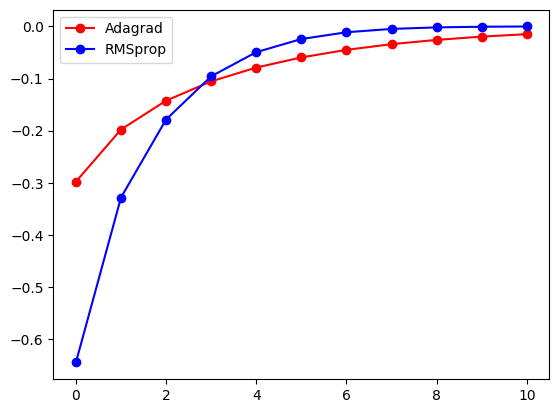

In [11]:
adagrad_history = adagrad()
rmsprp_history = rmsprp()

plt.plot(range(11), adagrad_history, 'ro-', label='Adagrad')
plt.plot(range(11), rmsprp_history, 'bo-', label='RMSprop')
plt.legend()
plt.show()

### Adam

In [12]:
def adam(lr=0.1, beta1=0.9, beta2=0.999, epsilon=1e-8, epochs=10):
    w = np.random.uniform(-2, 2)
    m, v = 0, 0
    history = [w]
    for t in range(1, epochs+1):
        grad = gradient(w)
        m = beta1 * m + (1 - beta1) * grad
        v = beta2 * v + (1 - beta2) * grad**2
        m_hat = m / (1 - beta1**t)
        v_hat = v / (1 - beta2**t)
        w -= lr * m_hat / (np.sqrt(v_hat) + epsilon)
        history.append(w)
    return history

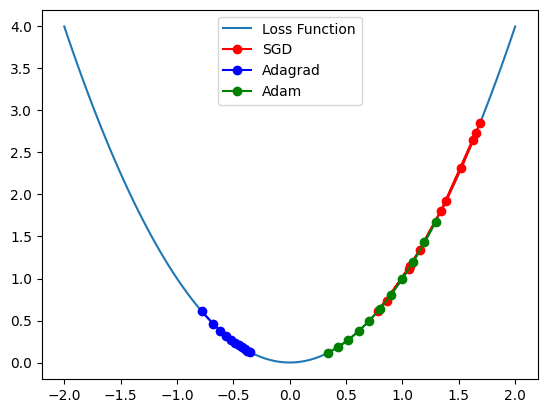

In [13]:
sgd_history = sgd()
adagrad_history = adagrad()
adam_history = adam()

x_vals = np.linspace(-2, 2, 100)
plt.plot(x_vals, loss(x_vals), label='Loss Function')

plt.plot(sgd_history, loss(np.array(sgd_history)), 'ro-', label='SGD')
plt.plot(adagrad_history, loss(np.array(adagrad_history)), 'bo-', label='Adagrad')
plt.plot(adam_history, loss(np.array(adam_history)), 'go-', label='Adam')

plt.legend()
plt.show()


### PyTorch 활용 -> SGD vs Adam 비교

SGD Loss: 467.6552429199219, Adam Loss: 406.3067932128906
SGD Loss: 6.134829044342041, Adam Loss: 379.3885192871094
SGD Loss: 5.635086536407471, Adam Loss: 353.5547790527344
SGD Loss: 5.180990219116211, Adam Loss: 328.9096374511719
SGD Loss: 4.768366813659668, Adam Loss: 305.5059509277344
SGD Loss: 4.393427848815918, Adam Loss: 283.3541259765625
SGD Loss: 4.052735805511475, Adam Loss: 262.4376220703125
SGD Loss: 3.7431585788726807, Adam Loss: 242.72509765625
SGD Loss: 3.4618563652038574, Adam Loss: 224.1779327392578
SGD Loss: 3.2062461376190186, Adam Loss: 206.75440979003906
Parameter containing:
tensor([[3.4078]], requires_grad=True) Parameter containing:
tensor([2.1538], requires_grad=True)
Parameter containing:
tensor([[1.3497]], requires_grad=True) Parameter containing:
tensor([0.5577], requires_grad=True)


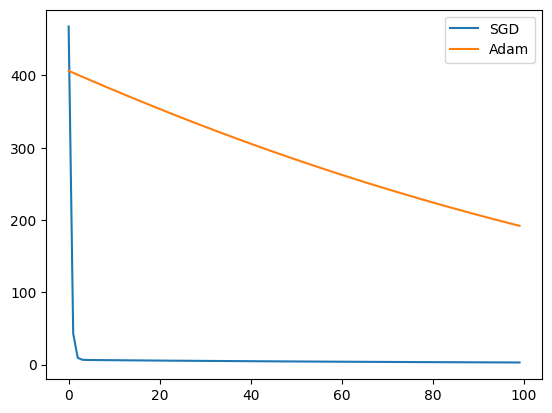

In [14]:
import torch
import torch.nn as nn
import torch.optim as optim

torch.manual_seed(42)
X = torch.rand(100, 1) * 10
y = 3*X + 5 + torch.randn(100, 1)

model_sgd = nn.Linear(1, 1)
model_adam = nn.Linear(1, 1)

criterion = nn.MSELoss()
optimizer_sgd = optim.SGD(model_sgd.parameters(), lr=0.01)
optimizer_adam = optim.Adam(model_adam.parameters(), lr=0.01)

epochs = 100
losses_sgd = []
losses_adam = []

for epoch in range(epochs):
    optimizer_sgd.zero_grad()
    output_sgd = model_sgd(X)  # forward pass
    loss_sgd = criterion(output_sgd, y)  # compute loss
    loss_sgd.backward()  # compute gradients
    optimizer_sgd.step()  # update weights

    optimizer_adam.zero_grad()
    output_adam = model_adam(X)
    loss_adam = criterion(output_adam, y)
    loss_adam.backward()
    optimizer_adam.step()

    losses_sgd.append(loss_sgd.item())
    losses_adam.append(loss_adam.item())

    if epoch % 10 == 0:
        print(f'SGD Loss: {loss_sgd.item()}, Adam Loss: {loss_adam.item()}')

print(model_sgd.weight, model_sgd.bias)
print(model_adam.weight, model_adam.bias)

plt.plot(losses_sgd, label='SGD')
plt.plot(losses_adam, label='Adam')
plt.legend()
plt.show()

---
### 종합 실습

In [21]:
# 1. 활성화 함수 및 손실 함수 정의
# CrossEntropyLoss, ReLU, softmax
def relu(x):
    return np.maximum(0, x)

def relu_d(x):
    return (x > 0).astype(float)

def softmax(x):
    exp_x = np.exp(x - np.max(x))
    return exp_x / np.sum(exp_x)

def cross_entropy_loss(y, y_hat):
    return -np.sum(y * np.log(y_hat + 1e-7)) / y.shape[0]

# 2. 학습 데이터 준비 (5x5 픽셀 숫자)
digits = {
    "0": np.array([
        [1, 1, 1, 1, 1],
        [1, 0, 0, 0, 1],
        [1, 0, 0, 0, 1],
        [1, 0, 0, 0, 1],
        [1, 1, 1, 1, 1]]).flatten(),
    "1": np.array([
        [0, 0, 1, 0, 0],           
        [0, 1, 1, 0, 0],
        [0, 0, 1, 0, 0],
        [0, 0, 1, 0, 0],
        [0, 1, 1, 1, 0]]).flatten()
}

X = np.array([digits["0"], digits["1"]])
y = np.array([[1, 0], [0, 1]])

# 3. 신경망 구조 설정
input_size = 25
hidden_size = 10
output_size = 2

# 가중치 초기화 (He 초기화)
W1 = np.random.randn(input_size, hidden_size) * np.sqrt(2. / input_size)
b1 = np.zeros((1,hidden_size))
W2 = np.random.randn(hidden_size, output_size) * np.sqrt(2. /hidden_size)
b2 = np.zeros((1,output_size))

# 4. 학습 (역전파 + SGD 최적화)
lr = 0.01
epochs = 1000

for epoch in range(epochs):
    # 순전파
    z1 = np.dot(X, W1) + b1
    a1 = relu(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = softmax(z2)
    
    # 손실 계산
    loss = cross_entropy_loss(y, a2)
    # 역전파
    dz2 = a2 - y
    dW2 = np.dot(a1.T, dz2) / X.shape[0]
    db2 = np.sum(dz2, axis=0, keepdims=True) / X.shape[0]
    
    da1 = np.dot(dz2, W2.T)
    dz1 = da1 * relu_d(z1) # ReLU 역전파
    
    dW1 = np.dot(X.T, dz1) / X.shape[0]
    db1 = np.sum(dz1, axis=0, keepdims=True) / X.shape[0]
    
    # 가중치 업데이트
    W1 -= lr * dW1
    b1 -= lr * db1
    W2 -= lr * dW2
    b2 -= lr * db2
    
    if epoch % 100 == 0:
        print(f'Epoch {epoch} Loss: {loss}')

# 5. 예측 테스트
def predict(x):
    z1 = np.dot(x, W1) + b1
    a1 = relu(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = softmax(z2)
    return np.argmax(a2, axis=1)

test_digit = np.array([[0, 0, 1, 0, 0],           
                        [0, 0, 1, 0, 0],
                        [0, 0, 1, 0, 0],
                        [0, 0, 1, 0, 0],
                        [0, 0, 1, 0, 0]]).flatten().reshape(1, -1)

print(f"예측 값: {predict(test_digit)}")

Epoch 0 Loss: 1.6841393708938488
Epoch 100 Loss: 0.7800130353140066
Epoch 200 Loss: 0.7135532745380825
Epoch 300 Loss: 3.453152760352557
Epoch 400 Loss: 8.059047775479087
Epoch 500 Loss: 16.11809565095832
Epoch 600 Loss: 16.11809565095832
Epoch 700 Loss: 8.059047775479163
Epoch 800 Loss: 8.059047775479163
Epoch 900 Loss: 8.059047775479163
예측 값: [1]


In [52]:
# 1. 활성화 함수 및 손실 함수 정의
# CrossEntropyLoss, softmax
def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

def cross_entropy_error(y, y_hat):
    return -np.sum(y * np.log(y_hat + 1e-7)) / y.shape[0]

def relu(x):
    return np.maximum(0, x)

def relu_d(x):
    return np.where(x > 0, 1, 0)

# 2. 학습 데이터 준비 (5x5 픽셀 숫자)
digits = {
    "0": np.array([
        [1, 1, 1, 1, 1],
        [1, 0, 0, 0, 1],
        [1, 0, 0, 0, 1],
        [1, 0, 0, 0, 1],
        [1, 1, 1, 1, 1]]).flatten(),
    "1": np.array([
        [0, 0, 1, 0, 0],           
        [0, 1, 1, 0, 0],
        [0, 0, 1, 0, 0],
        [0, 0, 1, 0, 0],
        [0, 1, 1, 1, 0]]).flatten(),
    "8": np.array([
        [1, 1, 1, 1, 1],
        [1, 0, 0, 0, 1],
        [1, 1, 1, 1, 1],
        [1, 0, 0, 0, 1],
        [1, 1, 1, 1, 1]]).flatten(),
}

X = np.array([digits["0"], digits["1"], digits["8"]])
y = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])

# 3. 신경망 구조 설정
input_size = 25
hidden_size = 10
output_size = 3

# 가중치 초기화 (He 초기화)
W1 = np.random.randn(input_size, hidden_size) * np.sqrt(2. / input_size)
b1 = np.zeros((1,hidden_size))
W2 = np.random.randn(hidden_size, output_size) * np.sqrt(2. / hidden_size)
b2 = np.zeros((1,output_size))

# 4. 학습 (역전파 + SGD 최적화)
lr = 0.01
epochs = 1000

for _ in range(epochs):
    # 순전파
    z1 = np.dot(X, W1) + b1
    a1 = relu(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = softmax(z2)

    # 손실 계산
    # error = cross_entropy_error(y, a2)
    # 역전파
    dz2 = a2 - y
    dW2 = np.dot(a1.T, dz2) / X.shape[0]
    db2 = np.sum(dz2, axis=0, keepdims=True) / X.shape[0]
    
    dz1 = np.dot(dz2, W2.T) * relu_d(z1)
    dW1 = np.dot(X.T, dz1) / X.shape[0]
    db1 = np.sum(dz1, axis=0, keepdims=True) / X.shape[0]
    # 가중치 업데이트
    
    W1 -= lr * dW1
    b1 -= lr * db1
    W2 -= lr * dW2
    b2 -= lr * db2

# 5. 예측 테스트
test_digit = np.array([
        [0, 1, 1, 1, 0],
        [1, 0, 0, 0, 1],
        [0, 1, 1, 1, 0],
        [1, 0, 0, 0, 1],
        [0, 1, 1, 1, 0]]).flatten(),

def predict(x):
    z1 = np.dot(x, W1) + b1
    a1 = relu(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = softmax(z2)
    return [0, 1, 8][np.argmax(a2, axis=1)[0]]

print(f"예측 값: {predict(test_digit)}")

예측 값: 8
